<a href="https://colab.research.google.com/github/Higgins2718/SFCrime/blob/master/sfcrime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

old_crime = pd.read_csv("/content/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
new_crime = pd.read_csv("/content/Police_Department_Incident_Reports__2018_to_Present.csv")

In [0]:
old_crime.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          1
dtype: int64

In [0]:
old_crime.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          1
dtype: int64

In [0]:
old_crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),1.461962e+13
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),1.500457e+13
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),1.406320e+13
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),1.503833e+13
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4.075398e+12


In [0]:
new_crime.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2019/05/01 01:00:00 AM,2019/05/01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975.0,190424067.0,191634131.0,II,Initial,NaN,15200.0,Offences Against The Family And Children,Other,Domestic Violence (secondary only),Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,POINT (-122.49962745519909 37.76256939715695),39.0,10.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2019/06/22 07:45:00 AM,2019/06/22,07:45,2019,Saturday,2019/06/22 08:05:00 AM,81465564020,814655.0,190450880.0,191730737.0,II,Initial,NaN,64020.0,Non-Criminal,Other,Mental Health Detention,Open or Active,06TH ST \ MINNA ST,24285000.0,Southern,South of Market,6.0,37.780535,-122.408161,POINT (-122.40816079455212 37.7805353858225),32.0,1.0,10.0,34.0,1.0,NaN,1.0,NaN,NaN,2.0
2,2019/06/03 04:16:00 PM,2019/06/03,16:16,2019,Monday,2019/06/03 04:16:00 PM,80769875000,807698.0,190397016.0,191533509.0,IS,Initial Supplement,NaN,75000.0,Missing Person,Missing Person,Found Person,Open or Active,EGBERT AVE \ INGALLS ST,20447000.0,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),88.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,2018/11/16 04:34:00 PM,2018/11/16,16:34,2018,Friday,2018/11/16 04:34:00 PM,73857915041,738579.0,180870806.0,183202539.0,IS,Initial Supplement,NaN,15041.0,Offences Against The Family And Children,Family Offenses,Elder Adult or Dependent Abuse (not Embezzleme...,Cite or Arrest Adult,MERCHANT ST \ KEARNY ST,24773000.0,Central,Chinatown,3.0,37.794860,-122.404876,POINT (-122.40487561154785 37.794859532228344),104.0,6.0,3.0,6.0,NaN,18.0,NaN,NaN,NaN,2.0
4,2019/05/27 02:25:00 AM,2019/05/27,02:25,2019,Monday,2019/05/27 02:55:00 AM,80509204134,805092.0,190378555.0,191470256.0,II,Initial,NaN,4134.0,Assault,Simple Assault,Battery,Open or Active,LAGUNA ST \ UNION ST,26583000.0,Northern,Marina,2.0,37.797716,-122.430559,POINT (-122.43055896140594 37.79771621229674),15.0,4.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,1.0


In [34]:
new_crime['Incident Category'].value_counts()

Larceny Theft                                 11067
Other Miscellaneous                            2576
Malicious Mischief                             2070
Assault                                        1992
Non-Criminal                                   1967
Burglary                                       1370
Warrant                                        1332
Lost Property                                  1239
Motor Vehicle Theft                            1207
Recovered Vehicle                              1099
Fraud                                          1009
Drug Offense                                    999
Robbery                                         819
Missing Person                                  747
Offences Against The Family And Children        664
Suspicious Occ                                  634
Disorderly Conduct                              619
Traffic Violation Arrest                        478
Other Offenses                                  295
Miscellaneou

In [0]:
old_crime['PdDistrict'].value_counts()

SOUTHERN      10998
NORTHERN       8754
MISSION        8340
CENTRAL        6841
BAYVIEW        6035
TENDERLOIN     4653
INGLESIDE      4620
PARK           3547
TARAVAL        3523
RICHMOND       3021
Name: PdDistrict, dtype: int64

In [10]:
new_crime['Police District'].value_counts()

Central       5219
Northern      4878
Mission       4415
Southern      4156
Tenderloin    3240
Bayview       2824
Ingleside     2347
Taraval       2269
Richmond      2171
Park          1653
Out of SF     1167
Name: Police District, dtype: int64

In [11]:
new_crime['Analysis Neighborhood'].value_counts()

Mission                           3599
Tenderloin                        3329
Financial District/South Beach    2931
South of Market                   2738
Bayview Hunters Point             1892
Western Addition                  1170
Nob Hill                           958
Hayes Valley                       934
North Beach                        928
Sunset/Parkside                    908
Castro/Upper Market                892
Marina                             833
Outer Richmond                     747
Russian Hill                       679
West of Twin Peaks                 663
Chinatown                          617
Pacific Heights                    579
Haight Ashbury                     564
Bernal Heights                     557
Potrero Hill                       539
Mission Bay                        513
Excelsior                          488
Inner Richmond                     419
Outer Mission                      411
Lone Mountain/USF                  395
Inner Sunset             

In [0]:
assault = new_crime[new_crime['Incident Category'] == 'Assault']

In [0]:
suicide = new_crime[new_crime['Incident Category'] == 'Suicide']

In [0]:
burglary = new_crime[new_crime['Incident Category'] == 'Burglary']

In [0]:
robbery = new_crime[new_crime['Incident Category'] == 'Robbery']

In [0]:
BBox = ((-122.5319, -122.3424,      
         37.6420, 37.8407))

In [0]:
ruh_m = plt.imread('/content/map-2.png')

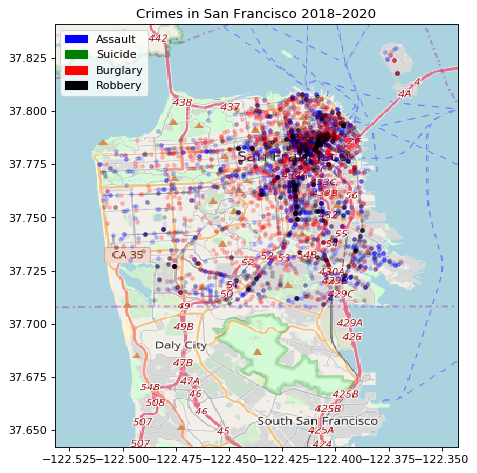

In [53]:
import matplotlib.patches as mpatches

plt.rcParams['figure.dpi']= 80


fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(assault.Longitude, assault.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.scatter(suicide.Longitude, suicide.Latitude, zorder=1, alpha= 0.2, c='g', s=10)
ax.scatter(burglary.Longitude, burglary.Latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.scatter(robbery.Longitude, robbery.Latitude, zorder=1, alpha= 0.2, c='k', s=10)

ax.set_title('Crimes in San Francisco 2018–2020')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
blue_patch = mpatches.Patch(color='blue', label='Assault')
green_patch = mpatches.Patch(color='green', label='Suicide')
red_patch = mpatches.Patch(color='red', label='Burglary')
black_patch = mpatches.Patch(color='black', label='Robbery')

plt.legend(handles=[blue_patch, green_patch, red_patch, black_patch ])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
plt.show()